# CEDA DataPoint - Demonstration

The CEDA DataPoint module wraps both the ``pystac_client`` and ``xarray`` packages into a single container for searching and accessing data. This notebook shows how methods function in DataPoint.

In [1]:
from datapoint import DataPointClient

client = DataPointClient(org='CEDA') # All public connection kwargs are known by default for CEDA

In [2]:
# Same as normal for pystac_client

client.list_collections()


cci: cci
cmip6: CMIP6
cordex: CORDEX
eocis-sst-cdrv3: EOCIS Sea-Surface Temperatures V3
land_cover: land_cover
sentinel1: Sentinel 1
sentinel2_ard: sentinel 2 ARD
ukcp: UKCP


In [3]:

client.list_search_terms()

cci:
 - datetime, start_datetime, end_datetime, units, project_id, institution_id, platform_id, activity_id, source_id, table_id, project, product_version, frequency, variables, doi, uuid, created, updated
cmip6:
 - datetime, start_datetime, end_datetime, access, index_node, latest, pid, replica, retracted, instance_id, citation_url, variable_long_name, variable_units, cf_standard_name, activity_id, data_specs_version, experiment_title, frequency, further_info_url, grid, grid_label, institution_id, mip_era, source_id, source_type, experiment_id, sub_experiment_id, nominal_resolution, table_id, variable_id, variant_label, levels, updated, created
cordex:
 - datetime, start_datetime, end_datetime, access, index_node, latest, pid, replica, retracted, file_count, size, variable_id, instance_id, variable_long_name, variable_units, cf_standard_name, driving_experiment_name, rcm_version, experiment_familys, product, domain, driving_model, time_frequency, experiment, project, institute, ensemb

In [4]:
item_search = client.search(
    collections=['cci'],
    max_items=10,
)

In [5]:
item_search.info()

Search terms:
 - collections: ['cci']
 - max_items: 10


In [6]:
item_search.cloud_assets()

<Item: esacci-sst-l4.json>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1MONTHLY_NIGHT-201812-202012-fv3.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1MONTHLY_DAY-201812-202012-fv3.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg_1MONTHLY-20180101230000-20201201230000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg-20180104230000-20201231230000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg_1MONTHLY-20180101220000-20201201220000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg-20180104220000-20201231220000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg_1MONTHLY-20180101114000-20201201140000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg-20180104114000-20201231140000-fv1.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-GOES-0.05deg_1MONTHLY-20180101130000-20201201130000-fv1.00>: 
 - reference_file


In [8]:
item = item_search[1]
item.variables

['land_surface_temperature']

In [14]:
# Assemble xarray and other datasets
ds = item.open_dataset(combine=False)
# Combine products/variables into a single dataset?

In [15]:
ds

<xarray.Dataset> Size: 2TB
Dimensions:          (channel: 2, time: 25, lat: 18000, lon: 36000,
                      length_scale: 1)
Coordinates:
  * channel          (channel) float64 16B 11.0 12.0
  * lat              (lat) float32 72kB -90.0 -89.99 -89.98 ... 89.98 89.99
  * lon              (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time             (time) datetime64[ns] 200B 2018-12-01 ... 2020-12-01
Dimensions without coordinates: length_scale
Data variables: (12/14)
    dtime            (time, lat, lon) timedelta64[ns] 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lcc              (time, lat, lon) float32 65GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst              (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_loc_atm  (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_loc_sfc  (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_ran      (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    ...               ...
    n                (time, lat, lon) float32 65GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    sataz            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    satze            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    solaz            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    solze            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    variance         (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.8
    cdm_data_type:              grid
    comment:                    These data were produced as part of the ESA L...
    creator_email:              djg20@le.ac.uk
    creator_name:               University of Leicester Surface Temperature G...
    creator_url:                https://climate.esa.int/en/projects/land-surf...
    ...                         ...
    time_coverage_end:          20201231T235959
    time_coverage_resolution:   P1M
    time_coverage_start:        20181201T000000
    title:                      ESA LST CCI land surface temperature data at ...
    kerchunk_revision:          1
    kerchunk_creation_date:     270224T211320

In [16]:
%%time
result = ds['lcc'].isel(time=slice(0,5)).mean(dim='time')

CPU times: user 17.7 ms, sys: 2.89 ms, total: 20.6 ms
Wall time: 19.7 ms


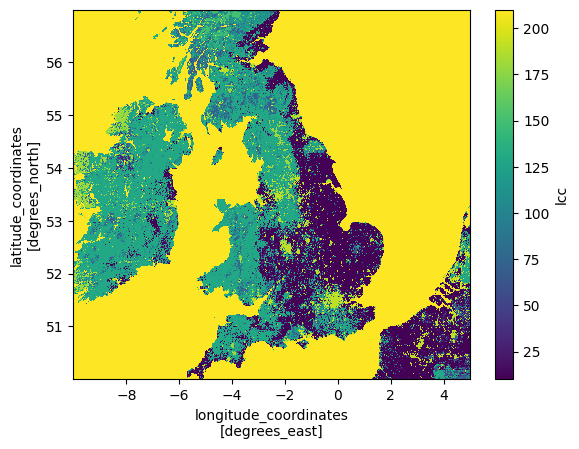

In [22]:
result.sel(lat=slice(50,57), lon=slice(-10,5)).plot()